In [125]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt 


In [75]:
df={
    "X1":[1,2,3,4,5,6,7],
    "X2":[2,4,10,-6,4,3,1],
    "Y":[1,6,3,4,5,6,2]
}

In [76]:
df=pd.DataFrame(df)

In [77]:
df

,X1,X2,Y
0,1,2,1
1,2,4,6
2,3,10,3
3,4,-6,4
4,5,4,5
5,6,3,6
6,7,1,2


In [78]:
df.columns

Index(['X1', 'X2', 'Y'], dtype='object')

In [79]:
model=LogisticRegression(solver='newton-cg')

In [80]:
X=df[['X1','X2']].values
Y=df['Y'].values

In [81]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [82]:
model.fit(xtrain,ytrain)

LogisticRegression(solver='newton-cg')

In [83]:
yh=model.predict(xtest)

In [84]:
print(r2_score(ytest,yh))


-0.3600000000000001


In [85]:
def predict(row,coefficient):
    yhat=coefficient[0]
    for i in range(len(row)-1):
        yhat+= coefficient[i+1]*row[i]
    return yhat

In [86]:
def coeff_sgd(train,l_rate,n_epoch):
    coef=[0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error=0
        for row in train:
            yhat=predict(row,coef)
            error=yhat-row[-1]
            sum_error+=error**2
            coef[0]=coef[0]-l_rate*error
            for i in range(len(row)-1):
                coef[i+1]=coef[i+1]-l_rate*error*row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

In [87]:
dataset=[[1,1],[2,3],[4,3],[3,2],[5,5]]
l_rate=0.001
n_epoch=50
coef=coeff_sgd(dataset,l_rate,n_epoch)
print(coef)

>epoch=0, lrate=0.001, error=46.236
>epoch=1, lrate=0.001, error=41.305
>epoch=2, lrate=0.001, error=36.930
>epoch=3, lrate=0.001, error=33.047
>epoch=4, lrate=0.001, error=29.601
>epoch=5, lrate=0.001, error=26.543
>epoch=6, lrate=0.001, error=23.830
>epoch=7, lrate=0.001, error=21.422
>epoch=8, lrate=0.001, error=19.285
>epoch=9, lrate=0.001, error=17.389
>epoch=10, lrate=0.001, error=15.706
>epoch=11, lrate=0.001, error=14.213
>epoch=12, lrate=0.001, error=12.888
>epoch=13, lrate=0.001, error=11.712
>epoch=14, lrate=0.001, error=10.668
>epoch=15, lrate=0.001, error=9.742
>epoch=16, lrate=0.001, error=8.921
>epoch=17, lrate=0.001, error=8.191
>epoch=18, lrate=0.001, error=7.544
>epoch=19, lrate=0.001, error=6.970
>epoch=20, lrate=0.001, error=6.461
>epoch=21, lrate=0.001, error=6.009
>epoch=22, lrate=0.001, error=5.607
>epoch=23, lrate=0.001, error=5.251
>epoch=24, lrate=0.001, error=4.935
>epoch=25, lrate=0.001, error=4.655
>epoch=26, lrate=0.001, error=4.406
>epoch=27, lrate=0.001,

In [93]:
dff=pd.read_csv('/Users/mac/Desktop/Programming_Stuff/Machine Learning/Datasets/winequality-red.csv',delimiter=';')

In [94]:
c=dff.columns
print(c)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [95]:
dff.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [96]:
dff.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [97]:
dff.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [105]:
X=dff.drop('quality',axis=1).values

In [106]:
Y=dff['quality'].values

In [111]:
normalizer=Normalizer()
x_norma=normalizer.fit_transform(X)


In [112]:
xtrain,xtest,ytrain,ytest=train_test_split(x_norma,Y,test_size=0.2,random_state=42)

In [113]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [114]:
y_pred=model.predict(xtest)

dfe=pd.DataFrame({'ACTUEL': y_pred,'PREDICTED':ytest})

In [124]:
print(dfe)
train_score = model.score(xtrain, ytrain)
test_score = model.score(xtest, ytest)

print(f'Training score: {train_score}')
print(f'Test score: {test_score}')

print('the root mean squared error is ',mean_squared_error(ytest,y_pred))
print('the root mean squared error is ',mean_absolute_error(ytest,y_pred))

       ACTUEL  PREDICTED
0    5.442349          6
1    5.190985          5
2    5.890042          6
3    5.517410          5
4    5.742844          6
..        ...        ...
315  5.777490          6
316  5.409635          5
317  5.298511          5
318  6.307435          6
319  4.880207          4

[320 rows x 2 columns]
Training score: 0.3526106173314646
Test score: 0.3808195371739038
the root mean squared error is  0.4046380604673782
the root mean squared error is  0.516207955757461


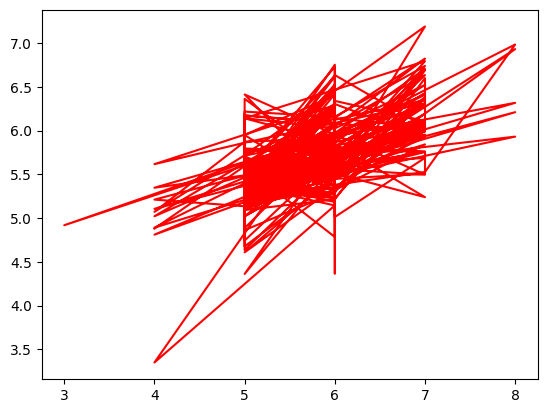

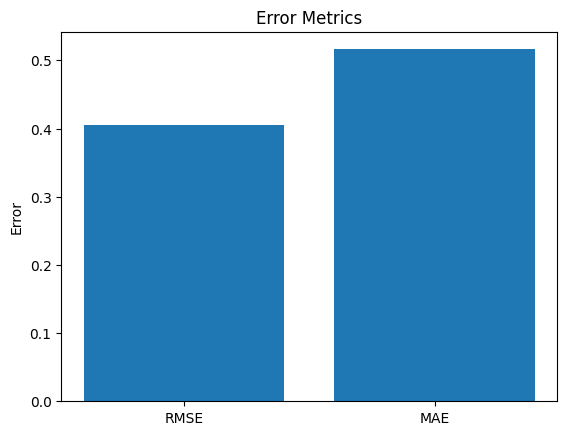

In [121]:
import matplotlib.pyplot as plt

# Calculate errors
rmse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)

# Create a bar plot
plt.bar(['RMSE', 'MAE'], [rmse, mae])
plt.ylabel('Error')
plt.title('Error Metrics')
plt.show()

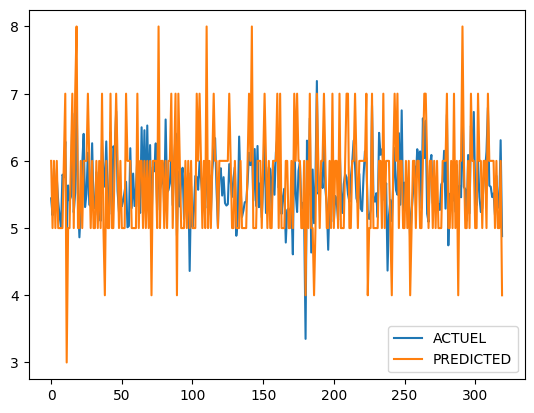

In [122]:
dfe.plot(kind='line')
plt.show()

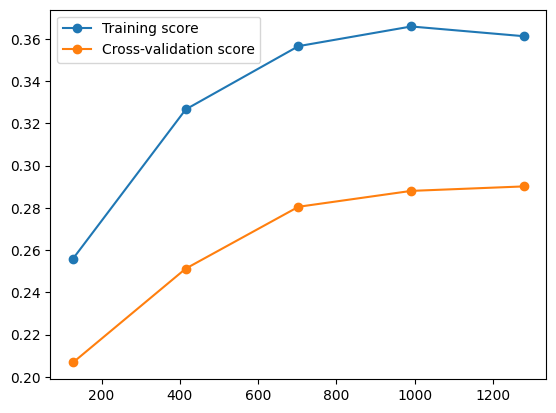

In [127]:
train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.legend(loc='best')
plt.show()